# 会話フェーズ
### リファレンス
[Jaccard係数](https://mieruca-ai.com/ai/jaccard_dice_simpson/)

### mecab setup
```
brew install mecab-python3
brew install  unidic-lite

poetry add mecab-python3
```

REF: [mecab-python3 1.0.8](https://pypi.org/project/mecab-python3/)

In [41]:
class Agent:
    def __init__(self, coordinates, histories):
      self.coordinates = coordinates
      self.histories = histories
    
    def move(self, move_vector):
        x = self.coordinates[0] - move_vector[0]
        y = self.coordinates[1] - move_vector[1]
        self.coordinates = (x, y)

In [42]:
import MeCab
import math

class Environment:
  D = 0.12
  V = 5
  
  def __init__(self, agents):
    self.agents = agents
    self.mecab = MeCab.Tagger("-Owakati")

  def move(self):
    for agent in self.agents:
      others = [a for a in self.agents if a != agent]
      move_vector = self.calc_move_vector(agent, others)
      agent.move(move_vector)

  def calc_move_vector(self, agent, others):
    def direction_vector(agent1, agent2):
      x = agent1.coordinates[0] - agent2.coordinates[0] 
      y = agent1.coordinates[1] - agent2.coordinates[1] 
      d = (x)**2 + (y)**2
      f = (x/d, y/d)

      d = direction(agent.histories[-1], o.histories[-1])
      direction_vector = (f[0] * d, f[1] * d)
      return direction_vector
    
    def direction(text1, text2):
      jaccard = jaccard_coefficient(text1, text2)
      if jaccard > self.D:
        return 1
      else:
        return -1

    def jaccard_coefficient(text1, text2):
      set1 = tokenize(text1)
      set2 = tokenize(text2)

      intersection = len(set1.intersection(set2))
      union = len(set1.union(set2))
      return intersection / union

    def tokenize(text):
      return set(self.mecab.parse(text).split())

    direction_vectors = []
    for o in others:
      direction_vectors.append(direction_vector(agent, o))

    total_x = sum(x for x, y in direction_vectors)
    total_y = sum(y for x, y in direction_vectors)
    magnitude = math.sqrt(total_x**2 + total_y**2)
    return ((total_x/magnitude) * self.V, (total_y/magnitude) * self.V)
    


### 共通の話題を持つ場合

(93, 15) ['私が好きな山は富士山です。']
(65, 78) ['私が好きな山は阿蘇山です。']
(22, 31) ['私が好きな山は磐梯山です。']


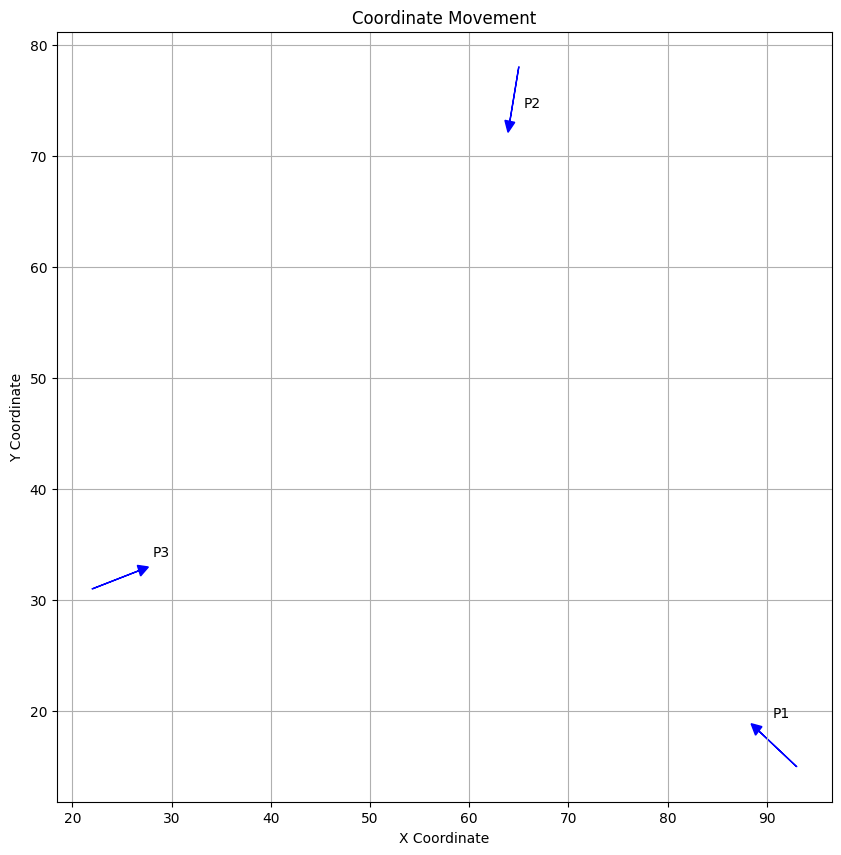

In [43]:
import matplotlib.pyplot as plt
import random

histories = [
  "私が好きな山は富士山です。",
  "私が好きな山は阿蘇山です。",
  "私が好きな山は磐梯山です。",
]

agents = [Agent((random.randint(0, 100), random.randint(0, 100)), [history]) for history in histories]

for agent in agents:
    print(agent.coordinates, agent.histories)

original_coordinates = [(agent.coordinates[0], agent.coordinates[1]) for agent in agents]

environment = Environment(agents)
environment.move()

move_coordinates = [(agent.coordinates[0], agent.coordinates[1]) for agent in agents]

plt.figure(figsize=(10, 10))
for index, ((x1, y1), (x2, y2)) in enumerate(zip(original_coordinates, move_coordinates)):
    plt.arrow(x1, y1, x2-x1, y2-y1, head_width=1, head_length=1, fc='blue', ec='blue') # 矢印を描画
    plt.annotate(f'P{index+1}', (x2, y2), textcoords="offset points", xytext=(10,10)) # 移動後の座標のラベル

plt.title('Coordinate Movement')
plt.xlabel('X Coordinate')
plt.ylabel('Y Coordinate')
plt.grid(True)
plt.show()

### 共通の話題を持たない場合

(83, 4) ['世界で一番重要なのは平和だよ!']
(36, 98) ['私が好きな山は阿蘇山です。']
(38, 97) ['とても綺麗な花の話をしたい']


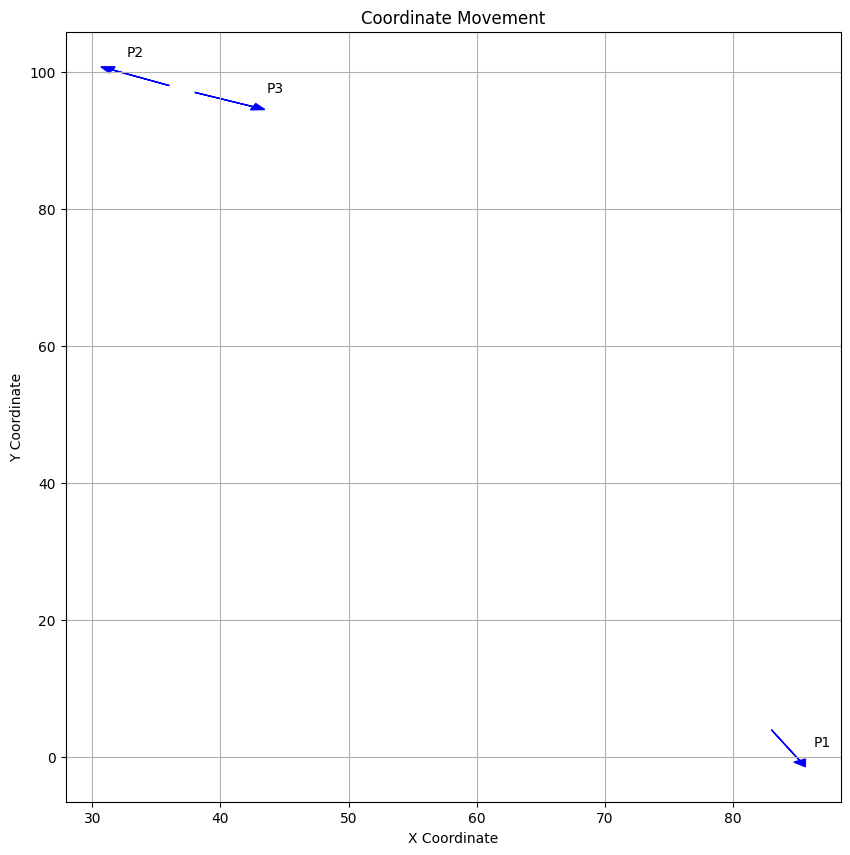

In [44]:
import matplotlib.pyplot as plt
import random

histories = [
  "世界で一番重要なのは平和だよ!",
  "私が好きな山は阿蘇山です。",
  "とても綺麗な花の話をしたい",
]

agents = [Agent((random.randint(0, 100), random.randint(0, 100)), [history]) for history in histories]

for agent in agents:
    print(agent.coordinates, agent.histories)

original_coordinates = [(agent.coordinates[0], agent.coordinates[1]) for agent in agents]

environment = Environment(agents)
environment.move()

move_coordinates = [(agent.coordinates[0], agent.coordinates[1]) for agent in agents]

plt.figure(figsize=(10, 10))
for index, ((x1, y1), (x2, y2)) in enumerate(zip(original_coordinates, move_coordinates)):
    plt.arrow(x1, y1, x2-x1, y2-y1, head_width=1, head_length=1, fc='blue', ec='blue') # 矢印を描画
    plt.annotate(f'P{index+1}', (x2, y2), textcoords="offset points", xytext=(10,10)) # 移動後の座標のラベル

plt.title('Coordinate Movement')
plt.xlabel('X Coordinate')
plt.ylabel('Y Coordinate')
plt.grid(True)
plt.show()